In [1]:
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from random import sample
import scipy.io

In [2]:
features = scipy.io.loadmat('ex3data1.mat')
print(features.keys())

weights = scipy.io.loadmat("ex3weights.mat")
print(weights.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])


In [3]:
X = features['X']
y = features['y']
X = np.c_[np.ones(X.shape[0]), X]
theta = [weights['Theta1'], weights['Theta2']]
print("X", X.shape)
print("y", y.shape)
print("theta1", weights['Theta1'].shape)
print("theta2", weights['Theta2'].shape)

X (5000, 401)
y (5000, 1)
theta1 (25, 401)
theta2 (10, 26)


In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def feedforward(X, theta):
    a = X
    depth = len(theta)
    for i in range(depth):
        w = theta[i]
        z = w.dot(a)
        a = sigmoid(z)
        if i != depth -1:
            a = np.insert(a, 0, 1)
    return a

In [6]:
def predict(X, theta):
    classified = []
    for index in range(len(X)):
        predict = feedforward(X[index], theta)
        classified.append(np.argmax(predict) + 1)
    return classified
result = predict(X, theta)
print(len(result))
print(np.unique(result))

5000
[ 1  2  3  4  5  6  7  8  9 10]


In [7]:
correct = 0
incorrect_index = []
for index in range(len(y)):
    if y[index] == result[index]:
        correct += 1
    else:
        incorrect_index.append(index)
        
print("correct: %d" % (correct))
print("accuracy: %.3f" % (correct/len(y)))

correct: 4876
accuracy: 0.975


In [17]:
def plotIncorrectData(incorrect_index):
    w, h = 20, 20
    for x in range(5):
        i = sample(incorrect_index, 1)
        index = i[0]
        image_data = np.array(features['X'][index]).reshape(w, h).T
        fig = plt.figure(figsize=(2,2))
        fig.suptitle("predicted: %d, origin: %d" % (result[index], y[index]))
        #image = scipy.misc.toimage(image_data) #for window
        plt.imshow(image_data, cmap=cm.gray)
    plt.show()

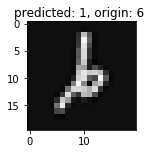

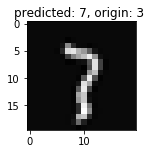

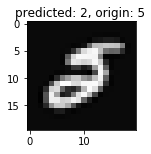

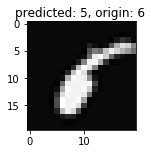

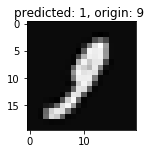

In [18]:
plotIncorrectData(incorrect_index)